In [1]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import os
import linecache

In [2]:
# function to open file with at least three columns and extract data: 
def open_file(path):
    
    # set up empty arrays [NOTE: use np.empty when re-writing! ]
    data = [] 
    x = []
    y = []
    y1 = []
    
    data = open(path) # open file 


    for s in data.readlines()[1:]: # skip first row and loop through file 

        # values must be separated by whitespace !!
        x.append(np.float(s.split()[0].replace(',','.')))  # extract 0th column and convert to float (decimal comma to decimal point)
        y.append(np.float(s.split()[1].replace(',','.')))  # extract 1st column and convert to float (decimal comma to decimal point)
        try:
            y1.append(np.float(s.strip().split()[2].replace(',','.'))) # if it exists: extract 2nd column and convert to float (decimal comma to decimal point)
        except:
            pass
    data.close() # close file 
    
    del data  # delete dummy array 
    
    return x, y, y1  # return first three columns [or first two columns and empty array] of file as floats 

In [3]:
def legend(path):

    # loop through all files in the given directory 
    # as well as any sub-directories
    for root, dirs, files in os.walk(path):
        for file in files:
            
            # open any files called "frog.dat"
            # NOTE: if there is more than one file
            #       the output variables will be overwritten
            if file == "frog.dat":
                df = open(os.path.join(root, file))
                for s in df.readlines():
                    if s.startswith('Autocor'):
                        leg_autoc = s
                    if s.startswith('Spectral'):
                        leg_spec = s
                    if s.startswith('Temporal'):
                        leg_temp = s

    # extract strings like e.g. 
    #
    #           Temporal FWHM: 6.0415 fs.
    #           Spectral FWHM: 14.433 nm.
    #           Autocorrelation FWHM: 9.0987 fs.
    #       
    # from the "frog.dat" file and return as variables            
    
    return leg_autoc, leg_spec, leg_temp

In [4]:
def plot_graph(x, y, y1, key, root, legend):
    
    y_array = [] # WHY ???
    x_array = [] # WHY ???
    y_array = np.asarray(y)
    x_array = np.asarray(x)
    
  
    if key == "Speck.dat": # this is the relevant filename!
        
        x_left = 900    # min lambda 
        x_right = 1200  # max lambda 
        
        i1 = x.index(x_array[np.where(x_array < 1150)][0])
        i2 = x.index(x_array[np.where(x_array > 950)][-1])
        
        indx = np.where(y_array > 0.01)[0]
        
        
        #center = int(len(y_array)/2-1)
        #i1 = x.index(x_array[np.where(x_array < (x_right + 1))][0])
        #i2 = x.index(x_array[np.where(x_array > x_left)][-1])
        title = '$Spectral$'
        name = 'Spectral.png'
        label = 'Wavelength, nm'
        
    elif key == "Ek.dat":
        
        indx = y.index(y_array[np.where(y_array > 0.01)][-1])
        
        x_left = - 100
        x_right = 100
        
        i1 = x.index(x_array[np.where(x_array > -50)][0])
        i2 = x.index(x_array[np.where(x_array < 50)][-1])
        
        #i1 = x.index(x_array[np.where(x_array > x_left)][0])
        #i2 = x.index(x_array[np.where(x_array > (x_right - 1))][0])
        title = '$Temporal$'
        name = 'Temporal.png'
        label = 'Delay, fs'
        
        
    #w_left = 750
    #w_right = 900
                             
    fig, ax = plt.subplots(figsize = (16,9))
    ax.plot(x, y, color="red", label = legend)
    ax.set_title(title, fontsize = 24)
    ax.set_xlabel(label, fontsize = 20)
    ax.set_ylabel("Intensity", color="red", fontsize = 20)
    ax.tick_params(axis='x', labelsize = 18, size = 6)
    ax.tick_params(axis='y', colors="red", labelsize = 18, size = 6)
    ax.set_ylim(-0.01, 1.01)
    ax.legend(fontsize = 15, loc = 'best')

    ax1 = ax.twinx()
    ax1.plot(x, y1, color = "b")
    ax1.set_ylabel("Phase (radians)", color="blue", fontsize = 20)
    ax1.yaxis.set_label_position('right') 
    ax1.yaxis.tick_right()
    ax1.tick_params(axis='y', colors="blue", labelsize = 18, size = 6)
    ax1.set_ylim(float(np.min(y1[i1:i2])) - (np.max(y1[i1:i2]) - np.min(y1[i1:i2]))/100, float(np.max(y1[i1:i2])) + (np.max(y1[i1:i2]) - np.min(y1[i1:i2]))/100)
    #ax1.set_ylim(100, 102)
    ax1.set_xlim(x_left, x_right)

    plt.show()
    
    fig.savefig(os.path.join(root,name), dpi = 300, bbox_inches='tight')
    print("Save" + ' ' + os.path.join(root,name))
    
    del x
    del y
    y1.clear()
    del y_array
    del x_array
    del indx
    del i1
    del i2
    
    plt.close(fig)

In [9]:
def plot_frog_maps(path):
    for root, dirs, files in os.walk(path):
        for file in files:
            
            if file == "Speck.dat":
                print('Find' + ' ' + os.path.join(root, file))
                plot_graph(open_file(os.path.join(root, file))[0], open_file(os.path.join(root, file))[1], open_file(os.path.join(root, file))[2], file, root, legend(path)[1])
            
            if file == "Ek.dat":
                print('Find' + ' ' + os.path.join(root, file))
                plot_graph(open_file(os.path.join(root, file))[0], open_file(os.path.join(root, file))[1], open_file(os.path.join(root, file))[2], file, root, legend(path)[2])
            
            if file == "a.dat":
                print('Find' + ' ' + os.path.join(root, file))
                df_1 = []
                data_real = []
                df_1 = open(os.path.join(root, file))
                for s in df_1.readlines()[1026:]:
                    data_real.append(np.float(s.strip().replace(',','.')))
                df_1.close()
                del df_1
                data_real_array = np.asarray(data_real)
                matrix_real = data_real_array.reshape(512, 512)
                
            if file == "arecon.dat":
                print('Find' + ' ' + os.path.join(root, file))
                df = []
                data_retrieved = []
                lmbda = []
                time = []
                df = open(os.path.join(root, file))
                for s in df.readlines()[2:514]:
                    lmbda.append(np.float(s.strip().replace(',','.')))
                df.close()
                df = open(os.path.join(root, file))
                for s in df.readlines()[514:1026]:
                    time.append(np.float(s.strip().replace(',','.')))
                df.close()
                df = open(os.path.join(root, file))
                for s in df.readlines()[1026:]:
                    data_retrieved.append(np.float(s.strip().replace(',','.')))
                df.close()
                del df
                lmbda_array = np.array(lmbda)
                time_array = np.array(time)
                data_retrieved_array = np.asarray(data_retrieved)
                matrix_retrieved = data_retrieved_array.reshape(512, 512)

                y_min = 190
                y_max = 330
                
                x_left = -1000
                x_right = 1000
                
                fig,(ax_1,ax_2,cax) = plt.subplots(1,3, figsize = (15,9), gridspec_kw={"width_ratios":[1,1, 0.05]})

                im = ax_1.imshow(np.sqrt(matrix_real), cmap = 'nipy_spectral', interpolation = 'none', extent = [time[0], time[-1], 511, 0], aspect = 'auto')
                ax_2.imshow(np.sqrt(matrix_retrieved), cmap = 'nipy_spectral', interpolation = 'none', extent = [time[0], time[-1], 511, 0], aspect = 'auto')
                fig.subplots_adjust(wspace = 0.2)
                fig.colorbar(im, cax = cax)
                ax_1.set_ylim(y_min, y_max)
                ax_1.set_xlim(x_left, x_right)
                ax_2.set_ylim(y_min, y_max)
                ax_2.set_xlim(x_left, x_right)
                i= 0
                lmbda_labels = []
                time_labels = []
                for i in ax_1.get_yticks():
                    if i < 513:
                        lmbda_labels.append(int(lmbda[int(round(i))]))
                        time_labels.append(int(time[int(round(i))]))
                ax_1.set_yticklabels(lmbda_labels)
                ax_2.set_yticklabels(lmbda_labels)
                ax_1.set_title('$Real \ map$', fontsize = 24)
                ax_2.set_xlabel("Delay, fs", fontsize = 20)
                ax_1.set_ylabel("Wavelength, nm", fontsize = 20)
                ax_1.tick_params(axis='x', labelsize = 18, size = 6)
                ax_1.tick_params(axis='y', labelsize = 18, size = 6)
                ax_1.minorticks_on()
                ax_2.set_title('$Retrieved \ map$', fontsize = 24)
                ax_1.set_xlabel("Delay, fs", fontsize = 20)
                ax_2.tick_params(axis='x', labelsize = 18, size = 6)
                ax_2.tick_params(axis='y', labelsize = 18, size = 6)
                ax_2.minorticks_on()

                fig.savefig(os.path.join(root, 'FROG_maps'), dpi = 300, bbox_inches='tight')
                print("Save" + ' ' + os.path.join(root, 'FROG_maps'))
                #plt.close(fig)
                
                
            if file.endswith(".txt"):
                time_autocor = open_file(os.path.join(root, file))[0]
                sig_autocor = open_file(os.path.join(root, file))[1]
                print('Find' + ' ' + os.path.join(root, file))

                ## Autocorrelation trace   
                plt.figure(figsize=(16,9))
                plt.plot(time, matrix_real.sum(axis = 0)/np.max(matrix_real.sum(axis = 0)), lw = '2', label = 'Real trace')
                plt.plot(time_autocor, sig_autocor/np.max(sig_autocor), lw = 2, label = 'from LabView')
                plt.title(legend(path)[0], fontsize = 20)
                plt.xlim(x_left, x_right)
                plt.xlabel("Delay, fs", fontsize = 22)
                plt.ylabel("Intensity, norm. un.", fontsize = 22)
                #plt.title("$Autocorrelation \ trace$", fontsize = 24)
                plt.xticks(fontsize=18)
                plt.yticks(fontsize=18)
                plt.legend(fontsize = 12, loc = 'best')
                plt.savefig(os.path.join(root, 'Autocorrelation trace'), dpi = 300, bbox_inches='tight')
                print("Save" + ' ' + os.path.join(root, 'Autocorrelation trace'))

Find C:\Users\fsatto\Desktop\Multipass cell\2020-07-31\MPC\Air_1000 fs_5 mm glass\a.dat
Find C:\Users\fsatto\Desktop\Multipass cell\2020-07-31\MPC\Air_1000 fs_5 mm glass\arecon.dat
Save C:\Users\fsatto\Desktop\Multipass cell\2020-07-31\MPC\Air_1000 fs_5 mm glass\FROG_maps
Find C:\Users\fsatto\Desktop\Multipass cell\2020-07-31\MPC\Air_1000 fs_5 mm glass\Autocorrelation.txt
Save C:\Users\fsatto\Desktop\Multipass cell\2020-07-31\MPC\Air_1000 fs_5 mm glass\Autocorrelation trace
Find C:\Users\fsatto\Desktop\Multipass cell\2020-07-31\MPC\Air_1000 fs_5 mm glass\Ek.dat


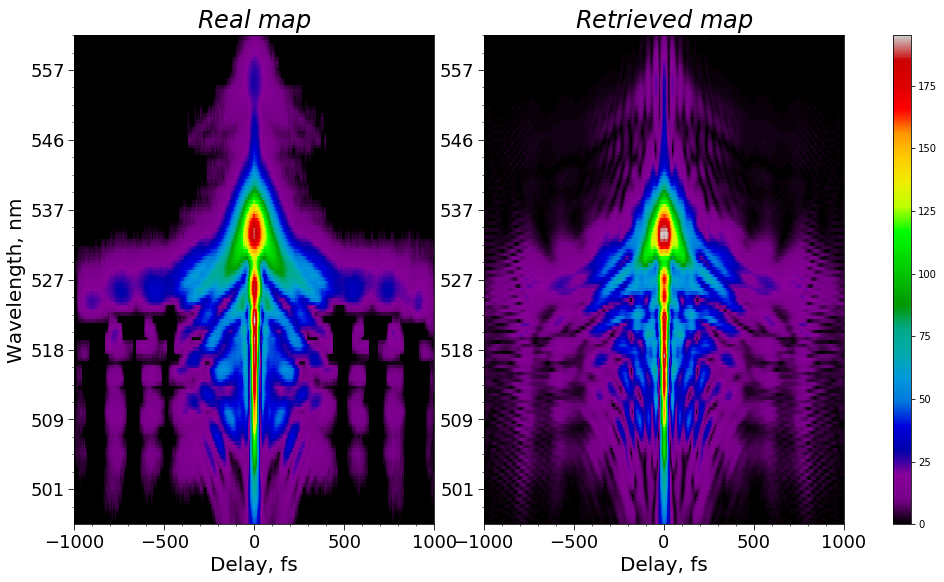

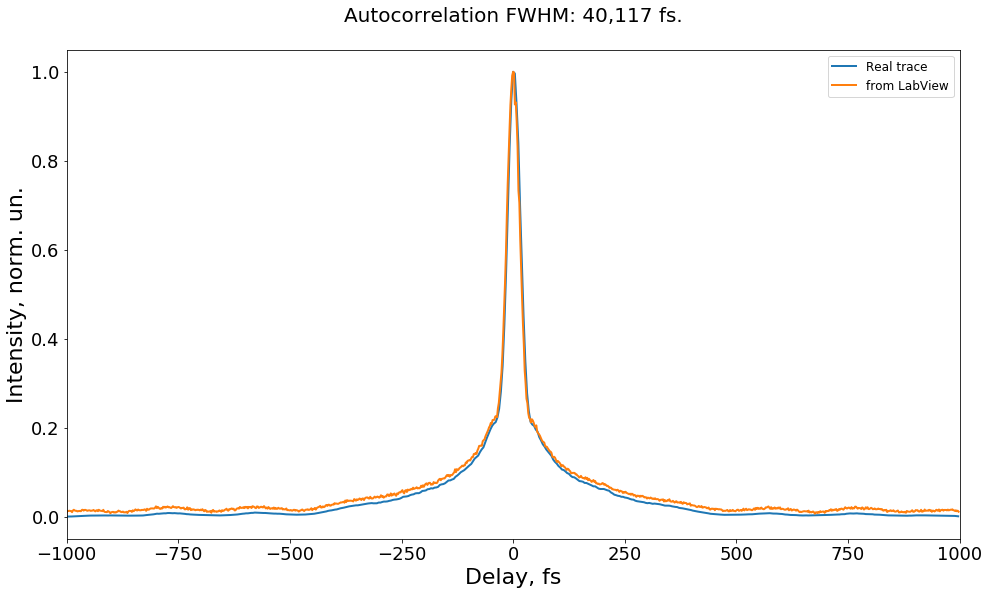

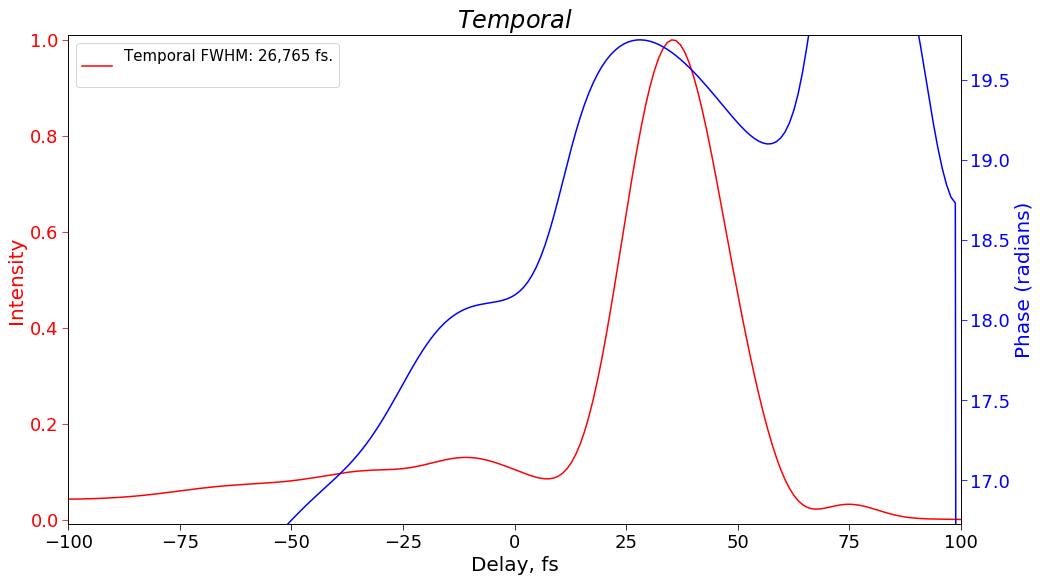

Save C:\Users\fsatto\Desktop\Multipass cell\2020-07-31\MPC\Air_1000 fs_5 mm glass\Temporal.png
Find C:\Users\fsatto\Desktop\Multipass cell\2020-07-31\MPC\Air_1000 fs_5 mm glass\Speck.dat


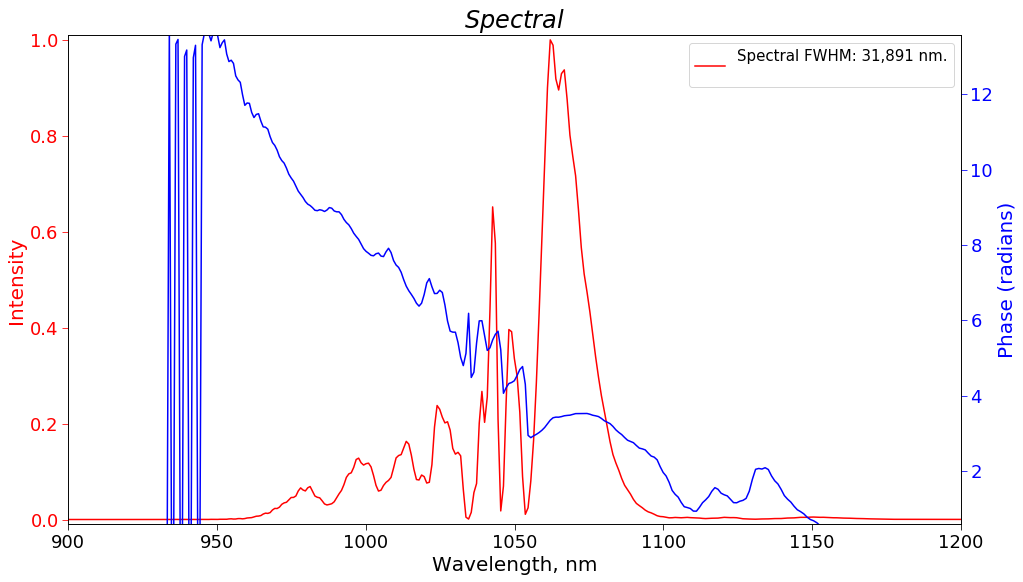

Save C:\Users\fsatto\Desktop\Multipass cell\2020-07-31\MPC\Air_1000 fs_5 mm glass\Spectral.png


In [15]:
plot_frog_maps(r'C:\Users\fsatto\Desktop\Multipass cell\2020-07-31\MPC\Air_1000 fs_5 mm glass')

In [ ]:
lmbda_real = open_file(r'A:\data\2020\2020-07-14\MPC\Spectra\8_bounces.txt')[0]
spec_real = np.asarray(open_file(r'A:\data\2020\2020-07-14\MPC\Spectra\8_bounces.txt')[1])

In [ ]:
lmbda_rec_forced = open_file(r'A:\data\2020\2020-07-14\MPC\FROG\1.4 bar Kr\8 bounces\Forced_spectrum\Speck.dat')[0]
spec_rec_forced = np.asarray(open_file(r'A:\data\2020\2020-07-14\MPC\FROG\1.4 bar Kr\8 bounces\Forced_spectrum\Speck.dat')[1])

lmbda_rec = open_file(r'A:\data\2020\2020-07-14\MPC\FROG\1.4 bar Kr\8 bounces\Speck.dat')[0]
spec_rec = np.asarray(open_file(r'A:\data\2020\2020-07-14\MPC\FROG\1.4 bar Kr\8 bounces\Speck.dat')[1])

plt.figure(figsize=(10,8))
plt.plot(lmbda_real,spec_real/max(spec_real), label = 'Real', lw = 2)
plt.plot(lmbda_rec, spec_rec/max(spec_rec), label = 'Reconstructed', lw = 2)
plt.plot(lmbda_rec_forced, spec_rec_forced/max(spec_rec_forced), label = 'Reconstracted_forced', lw = 2)
plt.xlim(900, 1200)
plt.legend(fontsize = 12)
plt.savefig(os.path.join(r'A:\data\2020\2020-07-14\MPC\Spectra','Comparison spectra'), dpi = 300, bbox_inches='tight')

In [61]:
path = r'\\ntap-fs-cfel.desy.de\atto$\data\2020\2020-07-16\MPC\FROG\10 bounces\8 mm glass\200 fs scan\Autocor_trace_200fs.txt'

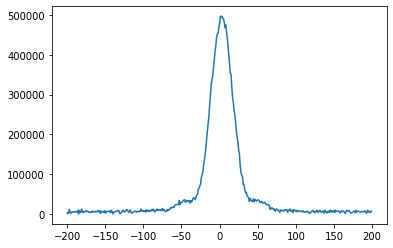

In [62]:
time_autocor = open_file(path)[0]
sig_autocor = open_file(path)[1]
sig_autocor = np.asarray(sig_autocor) - min(sig_autocor)
plt.plot(time_autocor, sig_autocor)

Find \\ntap-fs-cfel.desy.de\atto$\data\2020\2020-07-16\MPC\FROG\10 bounces\8 mm glass\200 fs scan\a.dat


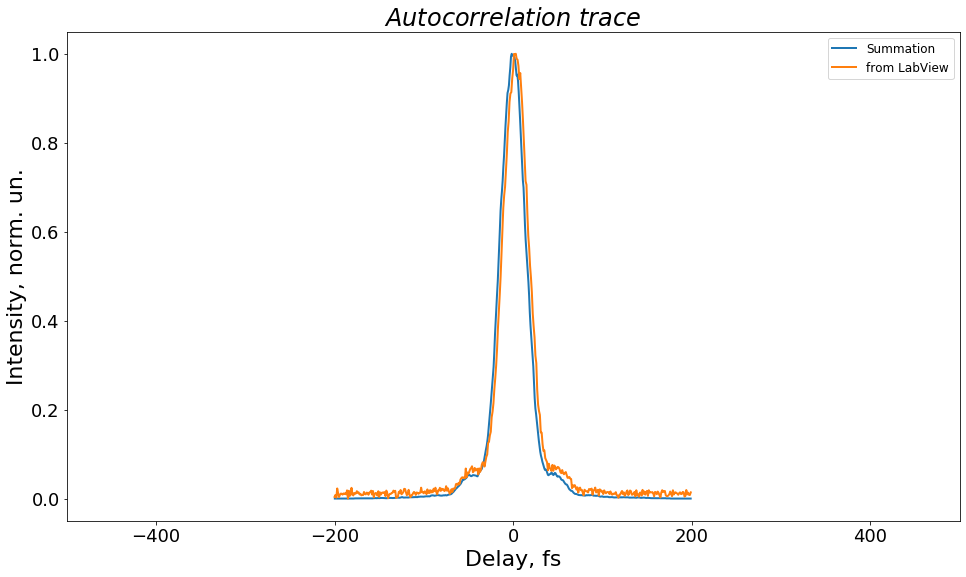

In [63]:
for root, dirs, files in os.walk(r'\\ntap-fs-cfel.desy.de\atto$\data\2020\2020-07-16\MPC\FROG\10 bounces\8 mm glass\200 fs scan'):
    for file in files:
        if file == "a.dat":
            print('Find' + ' ' + os.path.join(root, file))
            time = []
            df = []
            df = open(os.path.join(root, file))
            for s in df.readlines()[514:1026]:
                time.append(np.float(s.strip().replace(',','.')))
            df.close() 
            df_1 = []
            data_real = []
            df_1 = open(os.path.join(root, file))
            for s in df_1.readlines()[1026:]:
                data_real.append(np.float(s.strip().replace(',','.')))
            df_1.close()
            del df_1
            data_real_array = np.asarray(data_real)
            matrix_real = data_real_array.reshape(512, 512)
            
## Autocorrelation trace   
plt.figure(figsize=(16,9))
plt.plot(time, matrix_real.sum(axis = 0)/np.max(matrix_real.sum(axis = 0)), lw = 2, label = 'Summation')
plt.plot(time_autocor, sig_autocor/np.max(sig_autocor), lw = 2, label = 'from LabView')
plt.xlim(-500, 500)
plt.xlabel("Delay, fs", fontsize = 22)
plt.ylabel("Intensity, norm. un.", fontsize = 22)
plt.title("$Autocorrelation \ trace$", fontsize = 24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize = 12, loc = 'best')
#plt.savefig(os.path.join(r'\\ntap-fs-cfel.desy.de\atto$\data\2020\2020-07-16\MPC\FROG\10 bounces\3.5 mm glass\0.01 mm BBO\500 fs scan\frog 003','Autocorrelation trace'), dpi = 300, bbox_inches='tight')

In [64]:
idx_lV = np.argwhere(np.diff(np.sign(np.asarray(sig_autocor) - max(sig_autocor)/2))).flatten()
bw_lV = time_autocor[idx_lV[-1]] - time_autocor[idx_lV[0]]

In [65]:
idx_sum = np.argwhere(np.diff(np.sign(matrix_real.sum(axis = 0) - np.max(matrix_real.sum(axis = 0))/2))).flatten()
bw_sum = time[idx_sum[-1]] - time[idx_sum[0]]

In [66]:
print(bw_lV, bw_sum)

33.0 33.54


In [26]:
time_autocor = []
sig_autocor = []
names = []

for root, dirs, files in os.walk(r'A:\data\2020\2020-07-16\MPC\FROG\10 bounces\3.5 mm glass\0.1 mm BBO\200 fs scan'):
    for file in files:
            if file.endswith(".txt"):
                
                time_autocor.append(open_file(os.path.join(root, file))[0])
                sig_autocor.append(open_file(os.path.join(root, file))[1])
                names.append(file)
                print('Find' + ' ' + os.path.join(root, file))

Find A:\data\2020\2020-07-16\MPC\FROG\10 bounces\3.5 mm glass\0.1 mm BBO\200 fs scan\Autocorrelation trace from labview 200_001.txt
Find A:\data\2020\2020-07-16\MPC\FROG\10 bounces\3.5 mm glass\0.1 mm BBO\200 fs scan\Autocorrelation trace from labview 200_002.txt
Find A:\data\2020\2020-07-16\MPC\FROG\10 bounces\3.5 mm glass\0.1 mm BBO\200 fs scan\Autocorrelation trace from labview 200_003.txt
Find A:\data\2020\2020-07-16\MPC\FROG\10 bounces\3.5 mm glass\0.1 mm BBO\200 fs scan\Autocorrelation trace from labview 200_004.txt
Find A:\data\2020\2020-07-16\MPC\FROG\10 bounces\3.5 mm glass\0.1 mm BBO\200 fs scan\Autocorrelation trace from labview 200_005.txt
Find A:\data\2020\2020-07-16\MPC\FROG\10 bounces\3.5 mm glass\0.1 mm BBO\200 fs scan\Autocorrelation trace from labview 200_006.txt


Save A:\data\2020\2020-07-16\MPC\FROG\10 bounces\3.5 mm glass\0.1 mm BBO\200 fs scan\frog 006\Autocorrelation trace 500 fs


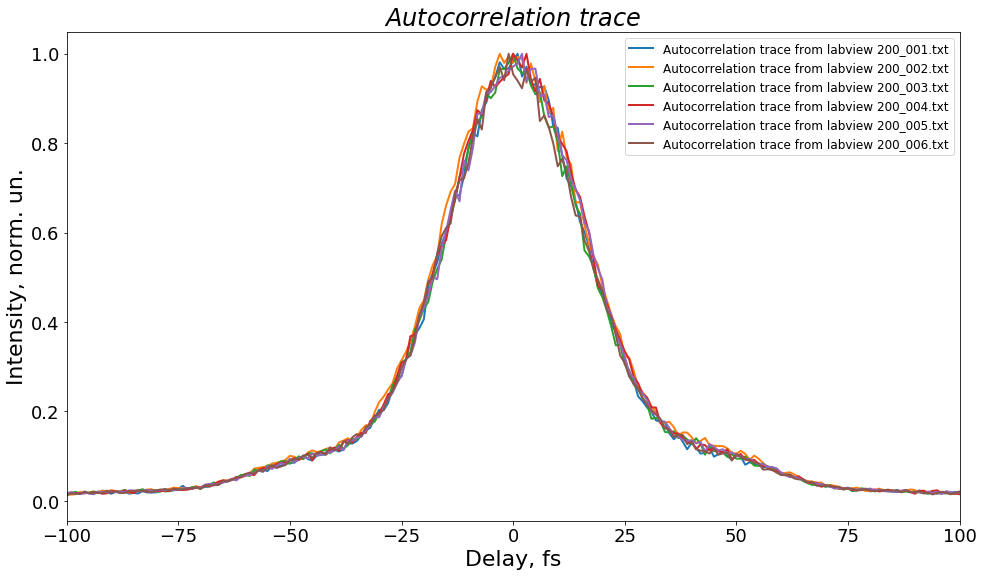

In [27]:
## Autocorrelation trace
plt.figure(figsize=(16,9))
for i in range(len(names)):
    
    plt.plot(time_autocor[i], sig_autocor[i]/np.max(sig_autocor[i]), lw = 2, label = names[i])
    
plt.xlabel("Delay, fs", fontsize = 22)
plt.ylabel("Intensity, norm. un.", fontsize = 22)
plt.title("$Autocorrelation \ trace$", fontsize = 24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize = 12, loc = 'best')
plt.xlim(-100, 100)
plt.savefig(os.path.join(root, 'Autocorrelation trace'), dpi = 300, bbox_inches='tight')
print("Save" + ' ' + os.path.join(root, 'Autocorrelation trace 500 fs'))
plt.show()

In [52]:
dur = []
name = []

for root, dirs, files in os.walk(r'C:\Users\fsatto\Desktop\2020-07-23\MPC\1 bar Kr'):
    for file in files:
            if file == "frog.dat":
                df = open(os.path.join(root, file))
                for s in df.readlines():
                    if s.startswith('Temporal'):
                        dur.append(s)
                df.close()
                name.append(os.path.join(root, file))

In [48]:
for i, val in enumerate(dur):
    print(val, name[i])

Temporal FWHM: 30,981 fs.
 C:\Users\fsatto\Desktop\2020-07-23\MPC\1 bar Kr\1 mm glass\200 fs\frog.dat
Temporal FWHM: 32,092 fs.
 C:\Users\fsatto\Desktop\2020-07-23\MPC\1 bar Kr\10 mm glass\200 fs\frog.dat
Temporal FWHM: 30,946 fs.
 C:\Users\fsatto\Desktop\2020-07-23\MPC\1 bar Kr\10 mm glass\200 fs\test\frog.dat
Temporal FWHM: 30,301 fs.
 C:\Users\fsatto\Desktop\2020-07-23\MPC\1 bar Kr\3 mm glass\200 fs\frog.dat
Temporal FWHM: 34,826 fs.
 C:\Users\fsatto\Desktop\2020-07-23\MPC\1 bar Kr\8 mm glass\200 fs\frog.dat


In [356]:
thick_list = []
dur_list = []

for root, dirs, files in os.walk(r'C:\Users\fsatto\Desktop\2020-07-23\MPC\1.6 bar Kr\500 fs'):
        for file in files:
            if file == "frog.dat":
                #print(root)
                df = open(os.path.join(root, file))
                for s in df.readlines():
                    if s.startswith('Temporal'):
                        dur_list.append(s.replace(',','.'))
                df.close()
                
                pres = root.split("\\")[-3]
                print(os.path.join(root, file))

                thick_list.append((root.split("\\")[-1]))

C:\Users\fsatto\Desktop\2020-07-23\MPC\1.6 bar Kr\500 fs\1 mm glass\frog.dat
C:\Users\fsatto\Desktop\2020-07-23\MPC\1.6 bar Kr\500 fs\10 mm glass\frog.dat
C:\Users\fsatto\Desktop\2020-07-23\MPC\1.6 bar Kr\500 fs\8 mm glass\frog.dat


In [357]:
import re

pattern = "\d+\.\d+"

dur_names = []
thick_names = []

for i, val in enumerate(dur_list):
    dur_names.append(re.findall(pattern, val)[0])
    
for i, val in enumerate(thick_list):
    thick_names.append(re.findall('\d+', val)[0])
    
results = [int(i) for i in thick_names]
    
thickness = []
durs = []

thickness = [thick_names for _, thick_names in sorted(zip(results, thick_names))]
durs = [dur_names for _, dur_names in sorted(zip(results, dur_names))]

print(thickness)

['1', '8', '10']


In [358]:
thickness = [int(i) for i in thickness]
durs = [float(i) for i in durs]

In [359]:
for i, val in enumerate(dur_list):
    print(val, thick_list[i])

Temporal FWHM: 26.672 fs.
 1 mm glass
Temporal FWHM: 28.416 fs.
 10 mm glass
Temporal FWHM: 28.246 fs.
 8 mm glass


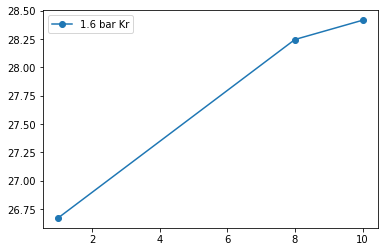

In [360]:
plt.plot(np.asarray(thickness)[:], np.asarray(durs)[:], 'o-', label = pres)
plt.legend()
plt.show()

In [5]:
import os

for root, dirs, files in os.walk(os.getcwd()):
     for file in files:
          print(file)

a.dat
arecon.dat
Autok.dat
Ek.dat
ExpMarg.dat
frog.dat
frog001IA.dat
frog001L.dat
frog001M.dat
frog001T.dat
frog002.frog
frog002.png
frog002IA.dat
frog002L.dat
frog002M.dat
frog002T.dat
frogold.dat
FROG_plots_Laura.ipynb
marg.dat
Readme.md
Speck.dat
a.dat
arecon.dat
Autok.dat
Ek.dat
ExpMarg.dat
frog.dat
frogold.dat
marg.dat
NIR_FROG_maps.png
NIR_FROG_Spectral.png
NIR_FROG_Temporal.png
Readme.md
Speck.dat
a.dat
arecon.dat
Autok.dat
Ek.dat
ExpMarg.dat
frog.dat
FROG_maps.png
marg.dat
Speck.dat
Spectral.png
Temporal.png
